### `Web Scraping :`

In [229]:
#importing required Libraries
from selenium import webdriver # Selenium Automates browser interaction for web scraping.
from selenium.webdriver.chrome.service import Service # Service Manages the ChromeDriver executable.
from selenium.webdriver.chrome.options import Options # Allows setting Chrome browser options
from selenium.webdriver.common.by import By # By Helps locate elements on a web page using various methods
from webdriver_manager.chrome import ChromeDriverManager # ChromeDriverManager Automatically handles downloading and installing ChromeDriver
from bs4 import BeautifulSoup # BeautifulSoup Parses HTML content for easy data extraction
import time # Time Allows adding delays to ensure pages load properly before scraping.
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode (remove if debugging)
chrome_options.add_argument("--disable-blink-features=AutomationControlled")  # Bypass bot detection
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36")

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

url = "https://www.imdb.com/list/ls098063263/"
driver.get(url)

# Wait for JavaScript to load
time.sleep(5)

# Get page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Lists to store extracted data
Title = []
Year = []
Duration = []
Rating = []
Voting = []
Director = []
Metascore = [] 
Worldwide_Gross = []

for i in range(1,3):
    url = f"https://www.imdb.com/list/ls098063263/?page={i}"
    driver.get(url)
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    # Titles     D
    for i in soup.find_all("h3", class_="ipc-title__text"):
        text = i.get_text(strip=True)
        match = re.search(r'^\d+\.\s(.+)', text)  # Extract movie title after number
        if match:
            Title.append(match.group(1))  # Extracted movie title

# Year     D
    for i in soup.find_all("span",class_ = "sc-f30335b4-7 jhjEEd dli-title-metadata-item"):
        text = i.get_text(strip=True)
        if re.search(r'\b(19\d{2}|20\d{2})\b',text):
            Year.append(re.search(r'\b(19\d{2}|20\d{2})\b',text).group(1))

#Duration     D
    for i in soup.find_all("span",class_ = "sc-f30335b4-7 jhjEEd dli-title-metadata-item"):
        text = i.get_text(strip=True)
        if re.search(r'(\d{1,2}h\s?\d{0,2}m?)',text):
            Duration.append(re.search(r'(\d{1,2}h\s?\d{0,2}m?)',text).group(1))

# Rating     D
    for i in soup.find_all("span",class_="ipc-rating-star--rating"):
        text = i.get_text(strip=True)
        if re.search(r'(\d\.\d)',text):
            Rating.append(re.search(r'(\d\.\d)',text).group(1))
        else:
            Rating.append(np.NaN)

# Voting     D
    for i in soup.find_all("span",class_="ipc-rating-star--voteCount"):
        text = i.get_text(strip=True)
        if re.search(r'(\d+(?:\.\d+)?[MK])',text):
            Voting.append(re.search(r'(\d+(?:\.\d+)?[MK])',text).group(1))
        else:
            Voting.append(np.nan)

# Director
    for i in soup.find_all("li", class_="ipc-metadata-list-summary-item"):
        # Find all directors in the current movie's section
        text = i.find_all("span", class_="sc-d49a611d-2 iPIqIX")
        if text:
            first_director = text[0].get_text(strip=True)  # Take only the first director
            Director.append(first_director)
        
# WorldWide Gross    D
    for i in soup.find_all("span", class_="ipc-md-header ipc-md-header--h2"):
        text = i.get_text(strip=True)  # Extract text and remove extra spaces
        if re.search(r'\$(\d{1,3}(?:,\d{3})*)', text):
            Worldwide_Gross.append(int(re.search(r'\$(\d{1,3}(?:,\d{3})*)', text).group(1).replace(",", "")))
        else:
            Worldwide_Gross.append(np.NaN)

# Metascore  D
    for i in soup.find_all("li", class_="ipc-metadata-list-summary-item"):
        text = i.find("span", class_="metacritic-score-box")
        if text:
            Metascore.append(int(text.get_text(strip=True)))
        else:
            Metascore.append(np.NaN)


# Close driver
driver.quit()

# Print extracted titles

print("success")
print(len(Title))
print(len(Metascore))
print(len(Rating))
print(len(Voting))
print(len(Year))
print(len(Duration))
print(len(Worldwide_Gross))
print(len(Director))

success
500
500
500
500
500
500
500
500


In [231]:
df = pd.DataFrame({"Title" : Title,
    "Year" : Year,
'Duration':Duration,
"Rating":Rating,
"Voting":Voting,
"Director":Director,
"Metascore":Metascore,
"Worldwide_Gross":Worldwide_Gross})
df

,Title,Year,Duration,Rating,Voting,Director,Metascore,Worldwide_Gross
0,Avatar,2009,2h 42m,7.9,1.4M,James Cameron,83.0,2923706026
1,Avengers: Endgame,2019,3h 1m,8.4,1.3M,Anthony Russo,78.0,2799439100
2,Avatar: The Way of Water,2022,3h 12m,7.5,529K,James Cameron,67.0,2320250281
3,Titanic,1997,3h 14m,7.9,1.3M,James Cameron,75.0,2264750694
4,Star Wars: Episode VII - The Force Awakens,2015,2h 18m,7.8,995K,J.J. Abrams,80.0,2071310218
...,...,...,...,...,...,...,...,...
495,John Wick: Chapter 3 - Parabellum,2019,2h 10m,7.4,449K,Chad Stahelski,73.0,328349908
496,Crocodile Dundee,1986,1h 37m,6.6,120K,Peter Faiman,62.0,328203506
497,Crazy Alien,2019,1h 56m,5.8,1.7K,Hao Ning,NaN,327598891
498,Se7en,1995,2h 7m,8.6,1.9M,David Fincher,65.0,327333559


In [3]:
df = pd.read_csv(r"D:\IMDB.csv") #Reading the CSV file into a DataFrame using pandas
df

,Unnamed: 0,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,0,Avatar,2009,2h 42m,7.9,1.4M,83.0,James Cameron,2923706026
1,1,Avengers: Endgame,2019,3h 1m,8.4,1.3M,78.0,Anthony Russo,2799439100
2,2,Avatar: The Way of Water,2022,3h 12m,7.5,529K,67.0,James Cameron,2320250281
3,3,Titanic,1997,3h 14m,7.9,1.3M,75.0,James Cameron,2264750694
4,4,Star Wars: Episode VII - The Force Awakens,2015,2h 18m,7.8,995K,80.0,J.J. Abrams,2071310218
...,...,...,...,...,...,...,...,...,...
495,495,John Wick: Chapter 3 - Parabellum,2019,2h 10m,7.4,449K,73.0,Chad Stahelski,328349908
496,496,Crocodile Dundee,1986,1h 37m,6.6,120K,62.0,Peter Faiman,328203506
497,497,Crazy Alien,2019,1h 56m,5.8,1.7K,NaN,Hao Ning,327598891
498,498,Se7en,1995,2h 7m,8.6,1.9M,65.0,David Fincher,327333559


In [4]:
df.shape[1]

9

In [5]:
df.shape[0]

500

### `Data Cleaning`

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True) # Dropping the unnamed column from the dataset 

In [7]:
# changing the Duartion column as it is hours we are changing minnutes
minutes = []  
for dur in df['Duration']:  # Iterate through each duration string in the 'Duration' column.
    if 'h' in dur and 'm' in dur:
        hours, mins = map(int, dur.replace('m', '').split('h')) 
        minutes.append(hours * 60 + mins)# Convert to total minutes (hours * 60 + minutes) and append to the list
        
    elif 'h' in dur: 
        hours = int(dur.replace('h', '').strip()) # Remove 'h', convert to integer, and append to the list
        minutes.append(hours * 60)
        
    elif 'm' in dur:
        mins = int(dur.replace('m', '').strip()) # Remove 'm', convert to integer, and append to the list
        minutes.append(mins)
        
    else:
        minutes.append(None)
df['Duration'] = minutes
df 

,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,Avatar,2009,162,7.9,1.4M,83.0,James Cameron,2923706026
1,Avengers: Endgame,2019,181,8.4,1.3M,78.0,Anthony Russo,2799439100
2,Avatar: The Way of Water,2022,192,7.5,529K,67.0,James Cameron,2320250281
3,Titanic,1997,194,7.9,1.3M,75.0,James Cameron,2264750694
4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,995K,80.0,J.J. Abrams,2071310218
...,...,...,...,...,...,...,...,...
495,John Wick: Chapter 3 - Parabellum,2019,130,7.4,449K,73.0,Chad Stahelski,328349908
496,Crocodile Dundee,1986,97,6.6,120K,62.0,Peter Faiman,328203506
497,Crazy Alien,2019,116,5.8,1.7K,NaN,Hao Ning,327598891
498,Se7en,1995,127,8.6,1.9M,65.0,David Fincher,327333559


In [8]:
res = [] #  Giving an empty list to store the coverted voting numbers
for i in df['Voting']:
    if 'M' in i:
        res.append(float(i.replace('M', '')) * 1000000) # Stores the result in a list
    elif 'K' in i: 
        res.append(float(i.replace('K', '')) * 1000) # Stores the result in a list
    else:
        res.append(float(i)) # Stores the result in a list
df['Voting'] = res
df

,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,Avatar,2009,162,7.9,1400000.0,83.0,James Cameron,2923706026
1,Avengers: Endgame,2019,181,8.4,1300000.0,78.0,Anthony Russo,2799439100
2,Avatar: The Way of Water,2022,192,7.5,529000.0,67.0,James Cameron,2320250281
3,Titanic,1997,194,7.9,1300000.0,75.0,James Cameron,2264750694
4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,995000.0,80.0,J.J. Abrams,2071310218
...,...,...,...,...,...,...,...,...
495,John Wick: Chapter 3 - Parabellum,2019,130,7.4,449000.0,73.0,Chad Stahelski,328349908
496,Crocodile Dundee,1986,97,6.6,120000.0,62.0,Peter Faiman,328203506
497,Crazy Alien,2019,116,5.8,1700.0,NaN,Hao Ning,327598891
498,Se7en,1995,127,8.6,1900000.0,65.0,David Fincher,327333559


In [9]:
df.info() # Display information about column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            500 non-null    object 
 1   Year             500 non-null    int64  
 2   Duration         500 non-null    int64  
 3   Rating           500 non-null    float64
 4   Voting           500 non-null    float64
 5   Metascore        488 non-null    float64
 6   Director         500 non-null    object 
 7   Worldwide_Gross  500 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 31.4+ KB


In [10]:
df.describe() # Display summary statistics for numerical columns

,Year,Duration,Rating,Voting,Metascore,Worldwide_Gross
count,500.000000,500.000000,500.000000,5.000000e+02,488.000000,5.000000e+02
mean,2010.204000,122.698000,6.994000,5.080626e+05,62.409836,6.199348e+08
std,10.085128,23.044324,0.870609,4.179002e+05,14.887948,3.417291e+08
min,1939.000000,81.000000,4.200000,1.200000e+03,24.000000,3.267158e+08
25%,2005.000000,106.000000,6.400000,2.290000e+05,51.750000,3.879420e+08
50%,2012.000000,122.000000,7.000000,4.175000e+05,62.000000,4.939462e+08
75%,2017.000000,136.000000,7.625000,6.855000e+05,73.000000,7.541276e+08
max,2024.000000,238.000000,9.000000,3.000000e+06,97.000000,2.923706e+09


In [11]:
df.isnull().sum() # Calculate the number of missing values in each column

Title               0
Year                0
Duration            0
Rating              0
Voting              0
Metascore          12
Director            0
Worldwide_Gross     0
dtype: int64

In [12]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].median()) # Fill missing Metascore with the median Metascore
df

,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,Avatar,2009,162,7.9,1400000.0,83.0,James Cameron,2923706026
1,Avengers: Endgame,2019,181,8.4,1300000.0,78.0,Anthony Russo,2799439100
2,Avatar: The Way of Water,2022,192,7.5,529000.0,67.0,James Cameron,2320250281
3,Titanic,1997,194,7.9,1300000.0,75.0,James Cameron,2264750694
4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,995000.0,80.0,J.J. Abrams,2071310218
...,...,...,...,...,...,...,...,...
495,John Wick: Chapter 3 - Parabellum,2019,130,7.4,449000.0,73.0,Chad Stahelski,328349908
496,Crocodile Dundee,1986,97,6.6,120000.0,62.0,Peter Faiman,328203506
497,Crazy Alien,2019,116,5.8,1700.0,62.0,Hao Ning,327598891
498,Se7en,1995,127,8.6,1900000.0,65.0,David Fincher,327333559


In [13]:
df.duplicated().sum() # Check for duplicate rows and remove them,Hence there is no duplicates in this data 

0

In [14]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns # selecting the numerical columns only for detecting the outliers
numeric_cols

Index(['Year', 'Duration', 'Rating', 'Voting', 'Metascore', 'Worldwide_Gross'], dtype='object')

In [15]:
# Outlier Detection using IQR for Numeric Columns and counting them
Q1 = df[numeric_cols].quantile(0.25) # 25 percentile 
Q3 = df[numeric_cols].quantile(0.75) # 75 percentile 
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum() # It calculates the lower and upper bounds for outlier detection using the Interquartile Range (IQR) method and count them
print('Number of outliers for each numeric_columns:')
outliers # printing the outliers count of each numeric column of ataFrame

Number of outliers for each numeric_columns:


Year               13
Duration            6
Rating              3
Voting             21
Metascore           0
Worldwide_Gross    23
dtype: int64

In [16]:
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Year']<ll)|(df['Year']> ul)]

1987.0 2035.0


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
105,E.T. the Extra-Terrestrial,1982,115,7.9,452000.0,92.0,Steven Spielberg,797307407
114,Star Wars: Episode IV - A New Hope,1977,121,8.6,1500000.0,90.0,George Lucas,775398507
211,Star Wars: Episode V - The Empire Strikes Back,1980,124,8.7,1400000.0,82.0,Irvin Kershner,550016086
260,Star Wars: Episode VI - Return of the Jedi,1983,131,8.3,1200000.0,58.0,Richard Marquand,482466382
264,Jaws,1975,124,8.1,690000.0,87.0,Steven Spielberg,477220580
316,The Exorcist,1973,122,8.1,474000.0,83.0,William Friedkin,430872776
356,Gone with the Wind,1939,238,8.2,345000.0,97.0,Victor Fleming,402382193
362,Grease,1978,110,7.2,312000.0,70.0,Randal Kleiser,396271103
372,Raiders of the Lost Ark,1981,115,8.4,1100000.0,86.0,Steven Spielberg,389925971
379,Back to the Future,1985,116,8.5,1400000.0,87.0,Robert Zemeckis,384577472


In [17]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Duration']<ll)|(df['Duration']> ul)]

61.0 181.0


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
2,Avatar: The Way of Water,2022,192,7.5,529000.0,67.0,James Cameron,2320250281
3,Titanic,1997,194,7.9,1300000.0,75.0,James Cameron,2264750694
30,The Lord of the Rings: The Return of the King,2003,201,9.0,2100000.0,94.0,Peter Jackson,1138027091
206,King Kong,2005,187,7.2,457000.0,81.0,Peter Jackson,556906378
298,Pearl Harbor,2001,183,6.2,360000.0,44.0,Michael Bay,449220945
356,Gone with the Wind,1939,238,8.2,345000.0,97.0,Victor Fleming,402382193


In [18]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Rating']<ll)|(df['Rating']> ul)]

4.562500000000001 9.462499999999999


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
201,Fifty Shades of Grey,2015,125,4.2,345000.0,46.0,Sam Taylor-Johnson,569651467
402,Fifty Shades Freed,2018,105,4.5,78000.0,31.0,James Foley,371985018
468,Alvin and the Chipmunks: Chipwrecked,2011,87,4.4,42000.0,24.0,Mike Mitchell,342695435


In [19]:
Q1 = df['Voting'].quantile(0.25)
Q3 = df['Voting'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Voting']<ll)|(df['Voting']> ul)]

-455750.0 1370250.0


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,Avatar,2009,162,7.9,1400000.0,83.0,James Cameron,2923706026
10,The Avengers,2012,143,8.0,1500000.0,69.0,Joss Whedon,1520538536
30,The Lord of the Rings: The Return of the King,2003,201,9.0,2100000.0,94.0,Peter Jackson,1138027091
34,The Dark Knight Rises,2012,164,8.4,1900000.0,78.0,Christopher Nolan,1114975066
38,Joker,2019,122,8.3,1600000.0,59.0,Todd Phillips,1078958629
53,The Dark Knight,2008,152,9.0,3000000.0,84.0,Christopher Nolan,1009025676
70,The Lord of the Rings: The Two Towers,2002,179,8.8,1900000.0,87.0,Peter Jackson,938210343
76,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.9,2100000.0,92.0,Peter Jackson,888120042
94,Inception,2010,148,8.8,2700000.0,74.0,Christopher Nolan,839030630
114,Star Wars: Episode IV - A New Hope,1977,121,8.6,1500000.0,90.0,George Lucas,775398507


In [20]:
Q1 = df['Metascore'].quantile(0.25)
Q3 = df['Metascore'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Metascore']<ll)|(df['Metascore']> ul)]

20.5 104.5


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross


In [21]:
Q1 = df['Worldwide_Gross'].quantile(0.25)
Q3 = df['Worldwide_Gross'].quantile(0.75)
Iqr = Q3-Q1
ll = Q1 - 1.5*Iqr
ul = Q3 + 1.5*Iqr
print(ll,ul)
df.loc[(df['Worldwide_Gross']<ll)|(df['Worldwide_Gross']> ul)]

-161336264.25 1303405887.75


,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
0,Avatar,2009,162,7.9,1400000.0,83.0,James Cameron,2923706026
1,Avengers: Endgame,2019,181,8.4,1300000.0,78.0,Anthony Russo,2799439100
2,Avatar: The Way of Water,2022,192,7.5,529000.0,67.0,James Cameron,2320250281
3,Titanic,1997,194,7.9,1300000.0,75.0,James Cameron,2264750694
4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,995000.0,80.0,J.J. Abrams,2071310218
5,Avengers: Infinity War,2018,149,8.4,1300000.0,68.0,Anthony Russo,2052415039
6,Spider-Man: No Way Home,2021,148,8.2,939000.0,71.0,Jon Watts,1921373347
7,Inside Out 2,2024,96,7.5,211000.0,73.0,Kelsey Mann,1693216995
8,Jurassic World,2015,124,6.9,699000.0,59.0,Colin Trevorrow,1671537444
9,The Lion King,2019,118,6.8,281000.0,55.0,Jon Favreau,1662020819


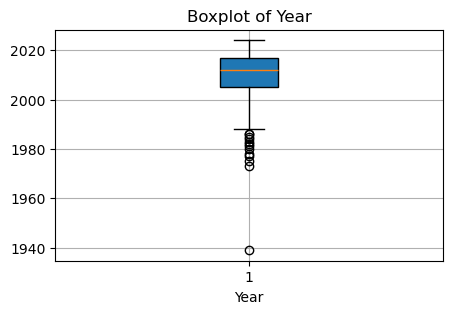

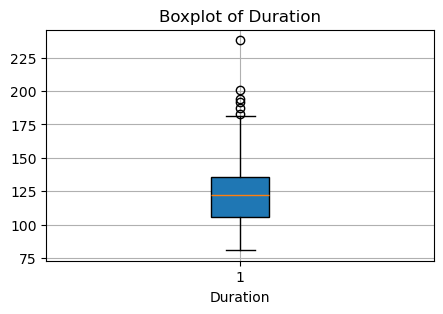

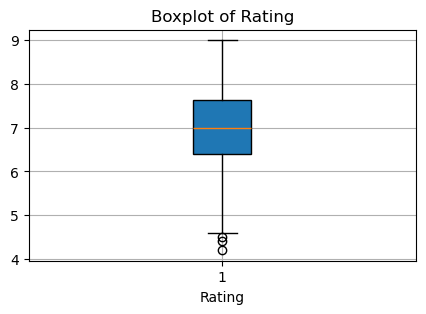

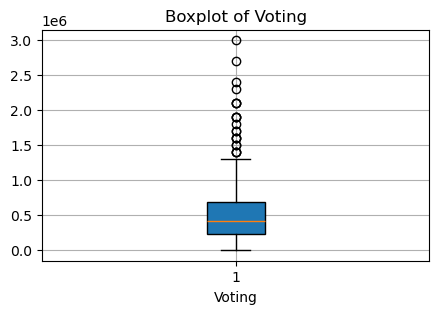

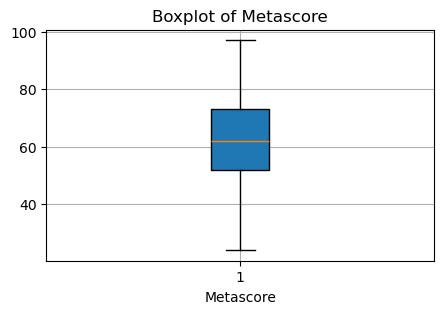

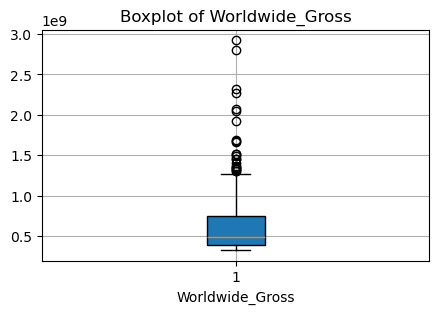

In [22]:
# Plot each numeric column as a separate boxplot
for i in numeric_cols:
    plt.figure(figsize=(5, 3))  # Set figure size for each plot
    plt.boxplot(df[i],vert=True,patch_artist=True)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.grid(True)
    plt.show()

### ` Data Analysis and Visualization (EDA):`

### ` Uni-variate Analysis:`

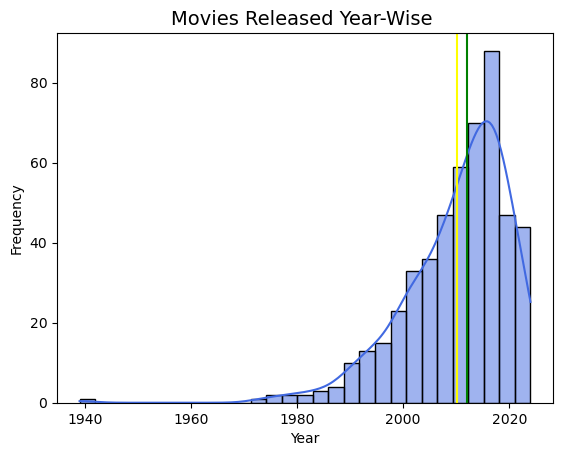

In [23]:
plt.title('Movies Released Year-Wise ', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Frequency')
sns.histplot(df['Year'],kde=True,color='royalblue')
plt.axvline(df["Year"].mean(),color ="yellow")
plt.axvline(df["Year"].median(),color ="green")  # Tail is longer on the left side,Mode > Median > Mean. left skew
plt.show()

### Insights:
- Movie releases have significantly increased since the 2000s, with a peak between 2015 and 2020, likely due to the rise of streaming platforms.
- The distribution is right-skewed, indicating fewer movies were produced before 1980, followed by a rapid increase.
- The mean and median lines suggest that most movies were released in recent years, reflecting the industry's growth.

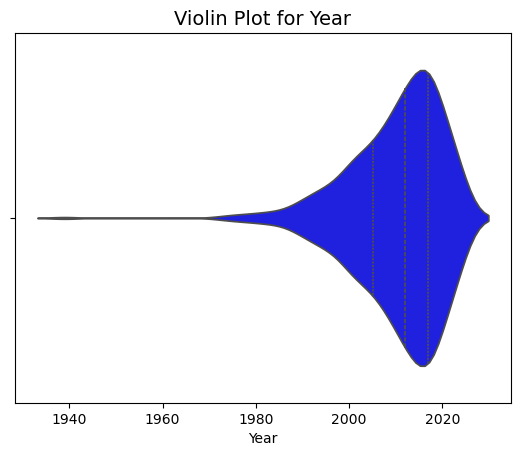

In [24]:
plt.title('Violin Plot for Year', fontsize=14)
plt.xlabel('Year')
sns.violinplot(x=df['Year'], inner="quartile",color='blue')
plt.show()

### Insights:

- Movie releases have significantly increased since the 2000s, with a peak between 2015 and 2020, likely due to the rise of streaming platforms.

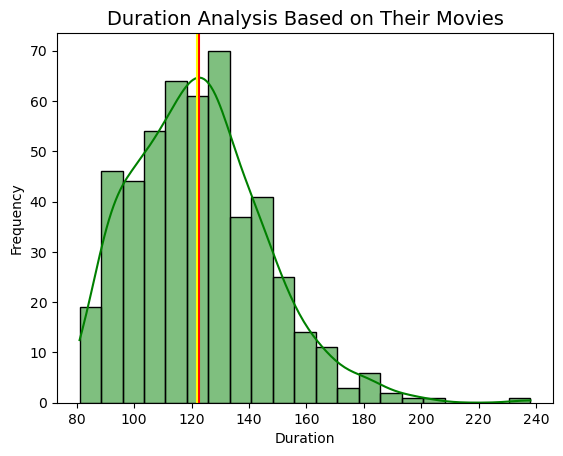

In [25]:
plt.title('Duration Analysis Based on Their Movies', fontsize=14)
plt.xlabel('Duration')
plt.ylabel('Frequency')
sns.histplot(df['Duration'],kde=True,color='green')
plt.axvline(df["Duration"].mean(),color ="red") # Mean of the Duration column
plt.axvline(df["Duration"].median(),color ="yellow")#  Tail is longer on the right side,Mode < Median < Mean. Right skew
plt.show()

### Insights:

- Most movies have a duration between 90 to 130 minutes, with the highest frequency around 120 minutes.
- The distribution is slightly right-skewed, indicating some movies with longer durations, but the majority are closer to the average.
- The mean (red line) and median (yellow line) are closely aligned, suggesting a fairly symmetric distribution with minor outliers on the longer end.

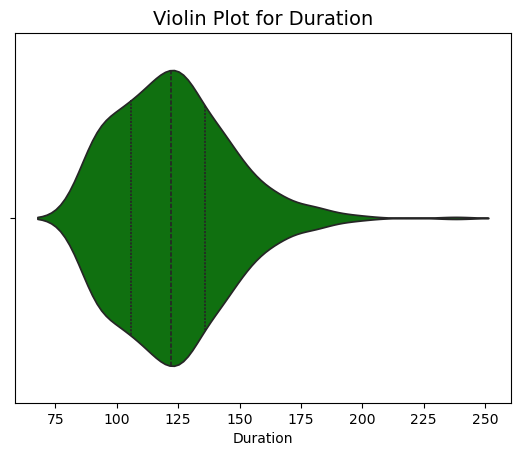

In [26]:
plt.title('Violin Plot for Duration', fontsize=14)
plt.xlabel('Duration')
sns.violinplot(x=df['Duration'], inner="quartile",color='green')
plt.show()

### Insights:

- Most movies have a duration between 90 to 130 minutes, with the highest frequency around 120 minutes.

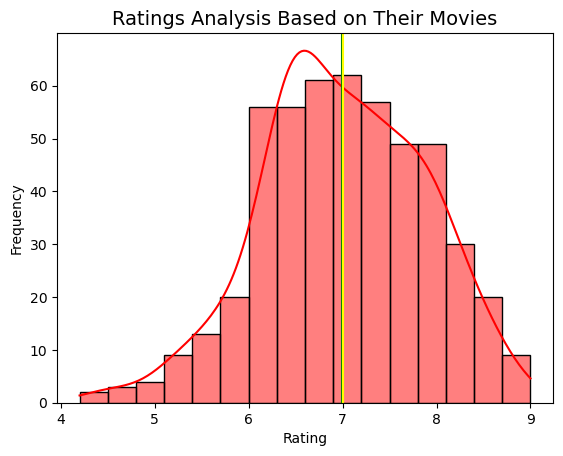

In [27]:
plt.title('Ratings Analysis Based on Their Movies', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.histplot(df['Rating'],kde=True,color='red')
plt.axvline(df["Rating"].mean(),color ="green") # Mean of the rating column
plt.axvline(df["Rating"].median(),color ="yellow")# The mean and median of the rating column is same,Hence it is normal distribution,Mode = Median = Mean
plt.show()

### Insights:
- Most movies have ratings between 6 and 8, with the highest frequency around 7, indicating generally favorable reviews.
- The distribution is left-skewed, with fewer low-rated movies, suggesting a positive bias in the ratings.
- The median (yellow line) is slightly lower than the mean (red line), reflecting the presence of some higher-rated movies pulling the mean upwards.

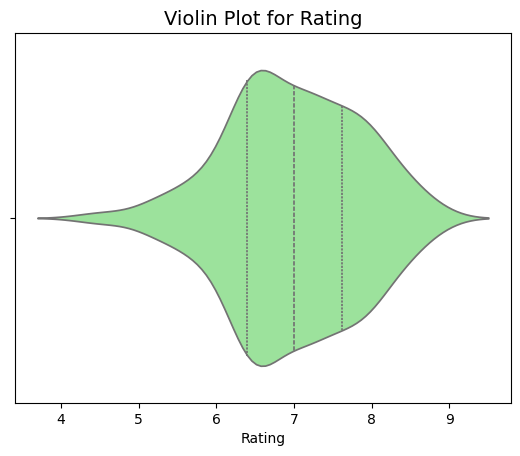

In [28]:
plt.title('Violin Plot for Rating', fontsize=14)
plt.xlabel('Rating')
sns.violinplot(x=df['Rating'], inner="quartile",color='lightgreen')
plt.show()

### Insights:
- Most movies have ratings between 6 and 8, with the highest frequency around 7, indicating generally favorable reviews.

<Axes: ylabel='Rating'>

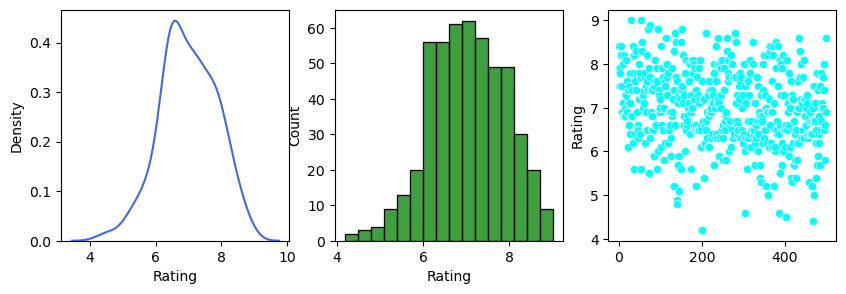

In [29]:
fi, ax=plt.subplots(1,3,figsize=(10,3))
sns.kdeplot(df["Rating"],ax=ax[0],color="royalblue")
sns.histplot(x=df["Rating"],ax = ax[1],color="green")
sns.scatterplot(df["Rating"],ax=ax[2],color="cyan")

### Insights:
- The KDE plot (left) shows a peak around a rating of 7, indicating that most movies receive moderate to good ratings.
- The histogram (middle) confirms the concentration of ratings between 6 and 8, with a few lower or higher-rated movies.
- The scatter plot (right) displays no clear trend or correlation, suggesting that the ratings are spread across movies without any particular pattern.

In [30]:
value_count_rating = df[['Rating']].value_counts()
value_count_rating

Rating
6.5       35
6.6       25
6.9       23
7.3       22
7.1       21
6.4       21
6.7       20
7.6       19
8.0       18
7.4       18
7.0       18
6.3       18
6.2       18
7.2       17
7.8       17
7.7       17
6.8       16
7.9       14
7.5       13
6.1       13
8.1       12
8.2       11
5.7        8
8.4        8
6.0        7
8.5        7
8.3        7
5.8        6
5.9        6
5.6        6
5.2        5
8.6        5
5.4        5
8.7        3
5.3        3
8.8        3
9.0        2
5.5        2
5.0        2
4.6        2
4.4        1
5.1        1
4.9        1
4.8        1
4.5        1
8.9        1
4.2        1
Name: count, dtype: int64

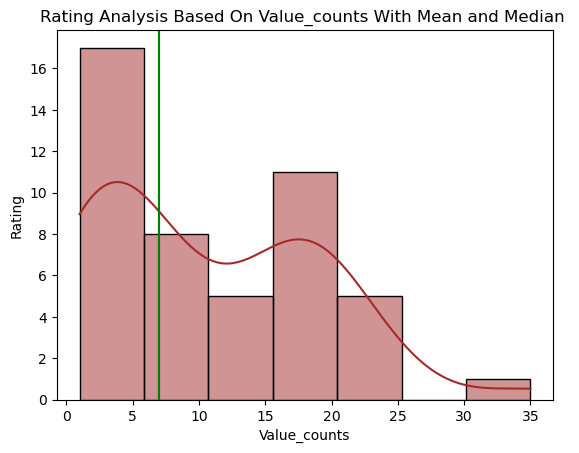

In [31]:
plt.title('Rating Analysis Based On Value_counts With Mean and Median ')
plt.xlabel('Value_counts')
plt.ylabel('Rating')
sns.histplot(data=value_count_rating,kde=True,color='brown')
plt.axvline(df["Rating"].mean(),color ="red")
plt.axvline(df["Rating"].median(),color ="green") # The mean and median of the rating column is same,Hence it is normal distribution,Mode = Median = Mean
plt.show()

### Insights:
- The distribution shows high variability in rating counts, with some ratings being more frequent than others.
- The left skew suggests that lower value counts are more common, with a sharp decline as the count increases.
- The mean (green line) is positioned near lower counts, indicating that a significant number of ratings are concentrated in this range.

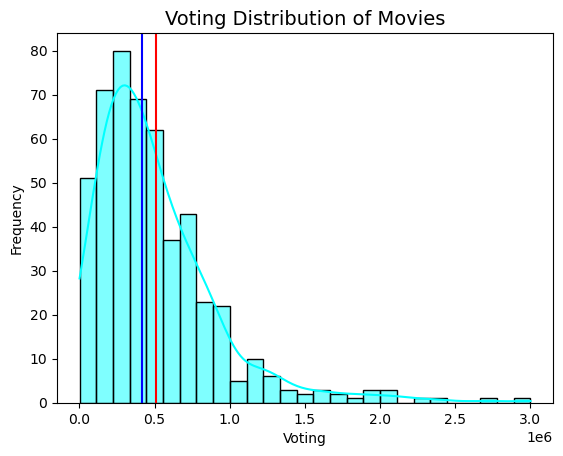

In [32]:
plt.title('Voting Distribution of Movies', fontsize=14)
plt.xlabel('Voting')
plt.ylabel('Frequency')
sns.histplot(df['Voting'],kde=True,color='cyan')
plt.axvline(df["Voting"].mean(),color ="red")
plt.axvline(df["Voting"].median(),color ="blue") # Tail is longer on the right side,Mode < Median < Mean. Right skew
plt.show()

### Insights:
- The voting distribution is right-skewed, indicating that most movies receive fewer votes, while a smaller number of movies receive significantly higher votes.
- The blue line (median) is lower than the red line (mean), confirming the presence of extreme outliers with exceptionally high votes.
- The peak voting frequency occurs at the lower end, suggesting a large proportion of movies have limited audience engagement.

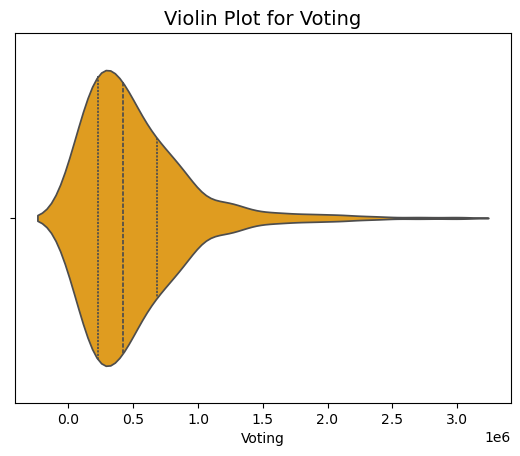

In [33]:
plt.title('Violin Plot for Voting', fontsize=14)
plt.xlabel('Voting')
sns.violinplot(x=df['Voting'], inner="quartile",color='orange')
plt.show()

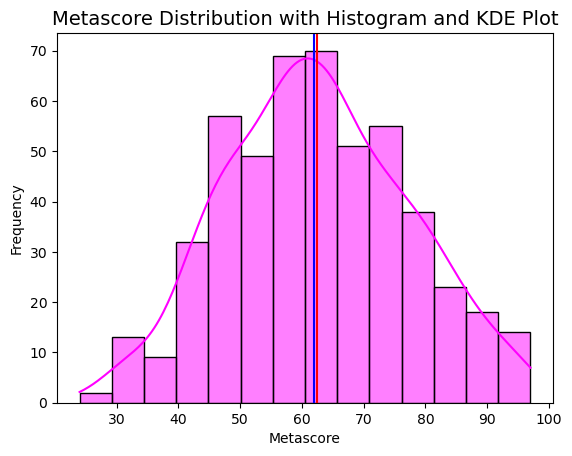

In [34]:
plt.title('Metascore Distribution with Histogram and KDE Plot', fontsize=14)
plt.xlabel('Metascore')
plt.ylabel('Frequency')
sns.histplot(df['Metascore'],kde=True,color='magenta')
plt.axvline(df["Metascore"].mean(),color ="red")
plt.axvline(df["Metascore"].median(),color ="blue")
plt.show()

### Insights:
- This plot shows the distribution of Metascore values using a Histogram (bar plot) and a Kernel Density Estimation (KDE) curve.
- The red line represents the mean of the Metascore values.
- The blue line represents the median of the Metascore values.

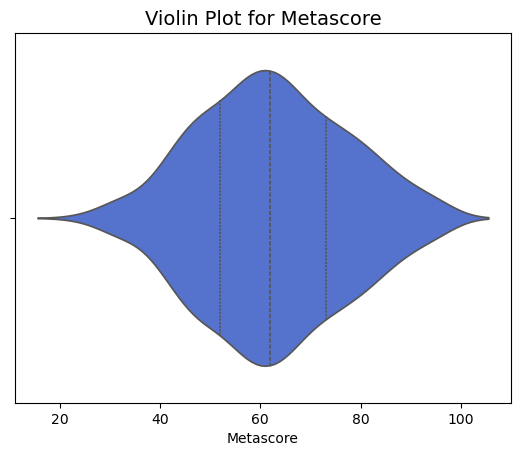

In [35]:
plt.title('Violin Plot for Metascore', fontsize=14)
plt.xlabel('Metascore')
sns.violinplot(x=df['Metascore'], inner="quartile",color='royalblue')
plt.show()

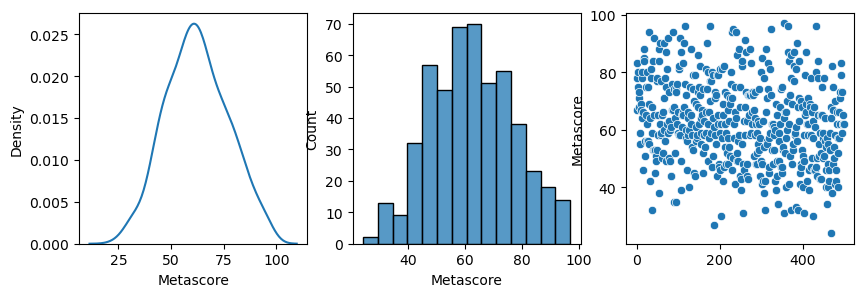

In [36]:
fi, ax=plt.subplots(1,3,figsize=(10,3))
sns.kdeplot(df["Metascore"],ax=ax[0])
sns.histplot(x=df["Metascore"],ax = ax[1])
sns.scatterplot(df["Metascore"],ax=ax[2])
plt.show()

### Insights:
- `Density Plot` (Left): The Metascore distribution appears relatively normal with a slight peak around 60-70. This suggests that most movies tend to score within that range.
- `Histogram` (Middle): The highest concentration of Metascores is around 60 to 80, with fewer movies having extremely low or high scores.
- `Scatter Plot` (Right): The spread of Metascores shows no clear pattern, but a balanced distribution across the data points, indicating the scores are widely distributed with no extreme outliers.

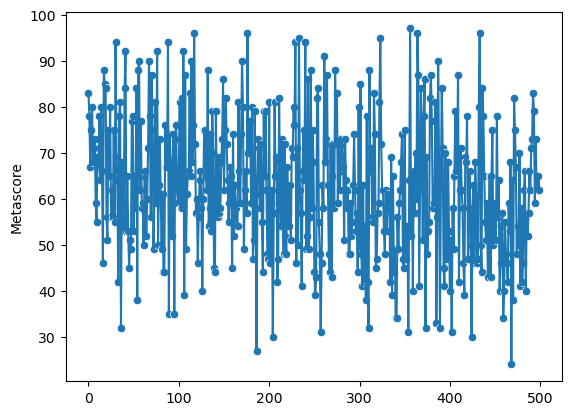

In [37]:
sns.lineplot(df["Metascore"])
sns.scatterplot(df["Metascore"])
plt.show()

### Insights:
- The Metascores are generally spread between 30 to 90, with a dense concentration around 50 to 80. There are no extreme outliers, indicating a fairly consistent scoring pattern.

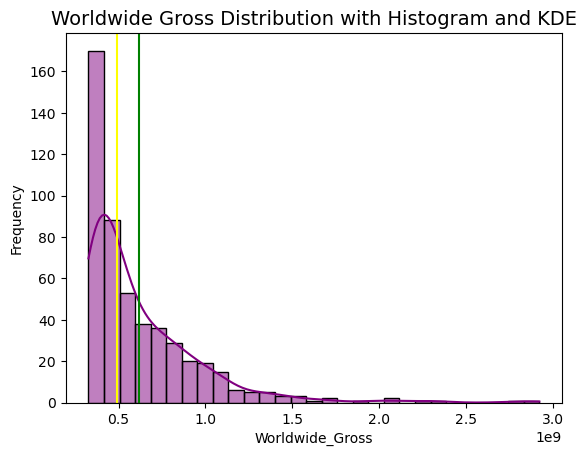

In [42]:
plt.title('Worldwide Gross Distribution with Histogram and KDE', fontsize=14)
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
sns.histplot(df['Worldwide_Gross'],kde=True,color='purple')
plt.axvline(df["Worldwide_Gross"].mean(),color ="green")
plt.axvline(df["Worldwide_Gross"].median(),color ="yellow") # Tail is longer on the right side. mean > median > mode , right skew
plt.show()

### Insights:
- The distribution of worldwide gross is right-skewed, indicating that most movies earn relatively low revenue, while a few achieve extremely high grosses.
- The mean is higher than the median, highlighting the impact of blockbuster movies on the average gross.
- The majority of movies cluster around lower revenue values, with a long tail extending toward higher earnings.

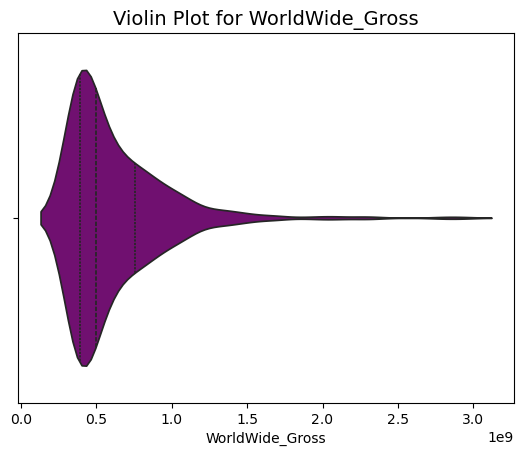

In [44]:
plt.title('Violin Plot for WorldWide_Gross', fontsize=14)
plt.xlabel('WorldWide_Gross')
sns.violinplot(x=df['Worldwide_Gross'],inner="quartile",color='purple')
plt.show()

In [40]:
top_directors = df['Director'].value_counts().sort_values(ascending=False).head(10)
top_directors

Director
Steven Spielberg     14
Michael Bay           8
David Yates           8
Christopher Nolan     8
Peter Jackson         7
Tim Burton            6
Roland Emmerich       5
J.J. Abrams           5
Ron Howard            5
Justin Lin            5
Name: count, dtype: int64

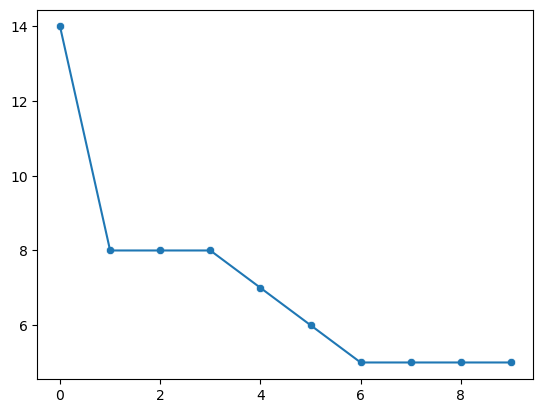

In [45]:
sns.scatterplot(top_directors.values)
sns.lineplot(top_directors.values)
plt.show()

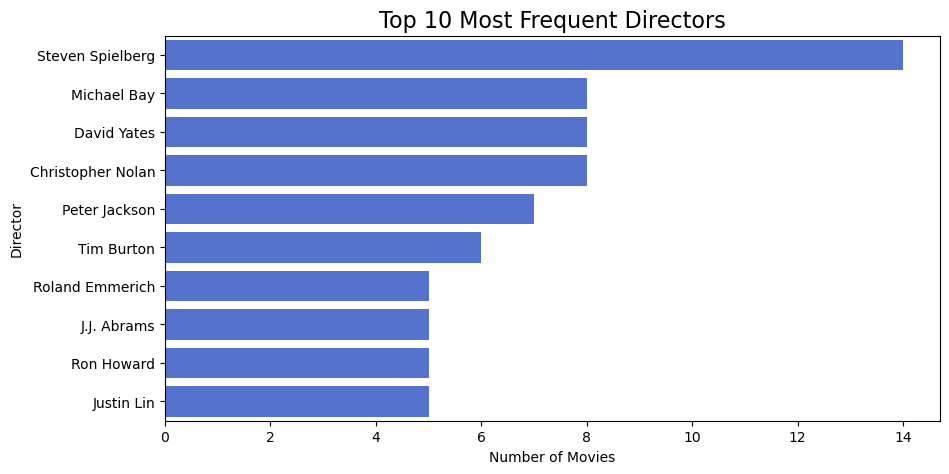

In [46]:
# Plotting the Top 10 Most Frequent Directors by using groupby
plt.figure(figsize=(10, 5))
sns.barplot(x= top_directors.values, y=top_directors.index,color='royalblue')
plt.title('Top 10 Most Frequent Directors', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

### Insights:
- Steven Spielberg leads as the most frequent director, significantly surpassing others in the number of movies directed.
- Michael Bay, David Yates, and Christopher Nolan also appear prominently, reflecting their active presence in the industry.
- The distribution shows a gradual decline in the number of movies directed, indicating a few directors dominate the movie landscape.

### `Bi-variate Analysis/Multivariate` : 

In [47]:
director_ratings = df.groupby(by = ['Director'])['Rating'].mean().sort_values(ascending=False).head(10)
director_ratings

Director
Irvin Kershner        8.7000
Hayao Miyazaki        8.6000
Joaquim Dos Santos    8.5000
Roger Allers          8.5000
Olivier Nakache       8.5000
Makoto Shinkai        8.4000
Bob Persichetti       8.4000
Lee Unkrich           8.3500
Christopher Nolan     8.3125
Richard Marquand      8.3000
Name: Rating, dtype: float64

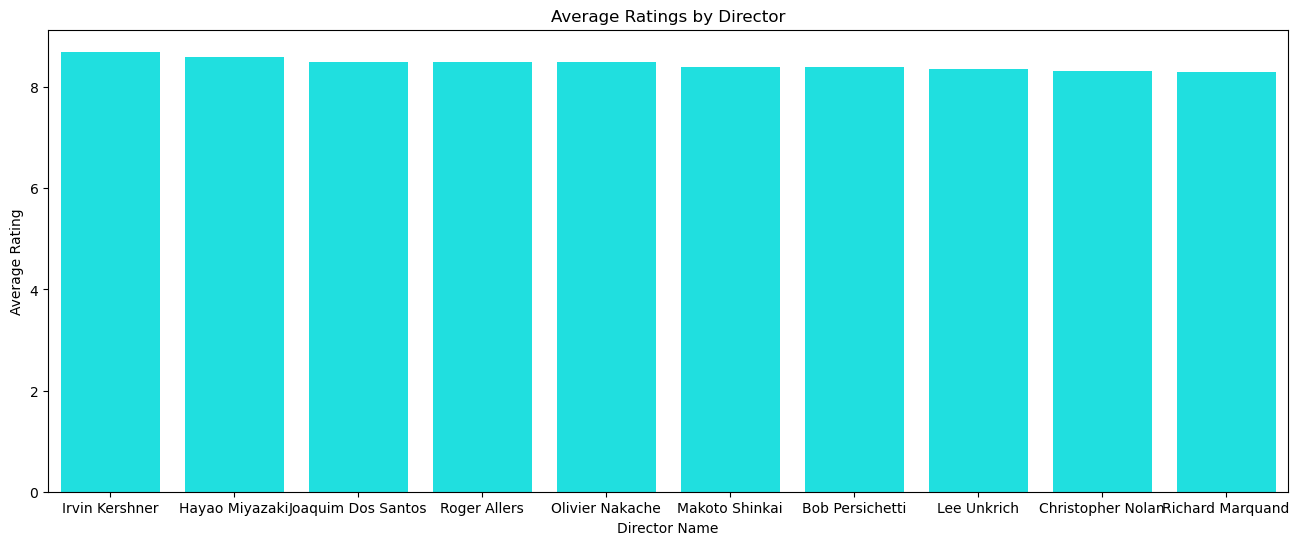

In [48]:
# Plotting the Top 10 Directors with the Highest Average Ratings by using groupby
plt.figure(figsize=(16,6))
sns.barplot(data=director_ratings,color='cyan' ) 
plt.title('Average Ratings by Director')
plt.xlabel('Director Name')
plt.ylabel('Average Rating')
plt.show()

### Insights:
- Irvin Kershner leads with the highest average rating, followed closely by Hayao Miyazaki and Joaquim Dos Santos.
- The average ratings among the top directors are consistently high, indicating their strong reputations and audience appreciation.
- Christopher Nolan, despite having more frequent movie releases, maintains a similarly high average rating, reflecting both quality and quantity in his work.

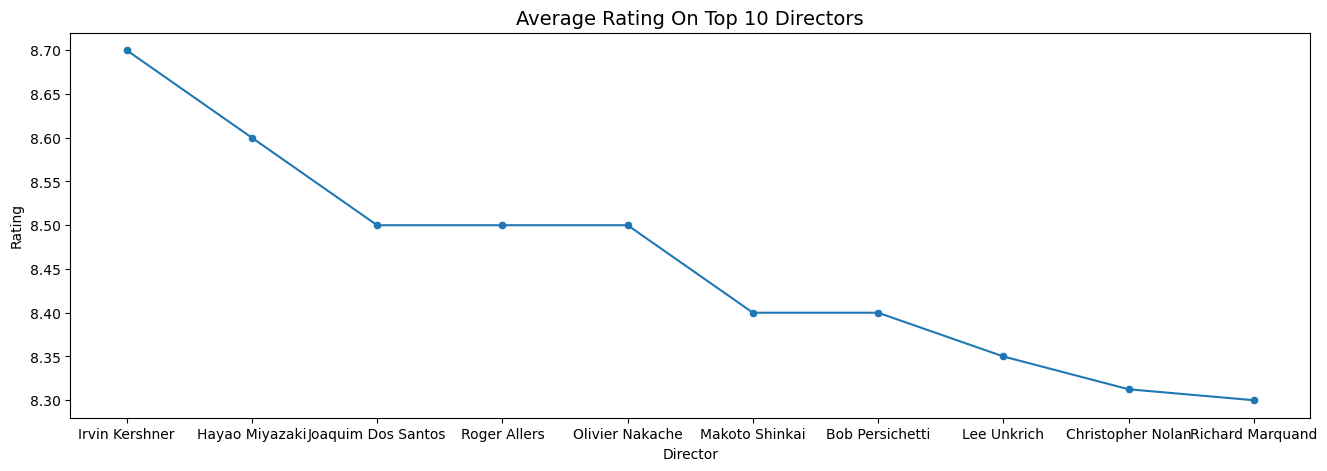

In [49]:
plt.figure(figsize=(16,5))
plt.title(f'Average Rating On Top 10 Directors', fontsize=14)
sns.lineplot(director_ratings)
sns.scatterplot(director_ratings)
plt.show()

### Insights:
- Irvin Kershner holds the highest average rating, with a notable lead over other directors.
- A gradual decline in ratings is observed, with Hayao Miyazaki and Joaquim Dos Santos maintaining strong positions.
- Christopher Nolan and Richard Marquand have slightly lower ratings in comparison, but they still remain among the top-rated directors.

In [50]:
director_gross = df.groupby(['Director'])['Worldwide_Gross'].sum().sort_values(ascending=False).head(10)
director_gross

Director
James Cameron        8408470566
Steven Spielberg     7759968641
Anthony Russo        6721322058
Peter Jackson        6459704045
David Yates          6423481942
Christopher Nolan    5935434082
Michael Bay          5718490761
J.J. Abrams          4399859101
Sam Raimi            3951081809
Jon Watts            3935022612
Name: Worldwide_Gross, dtype: int64

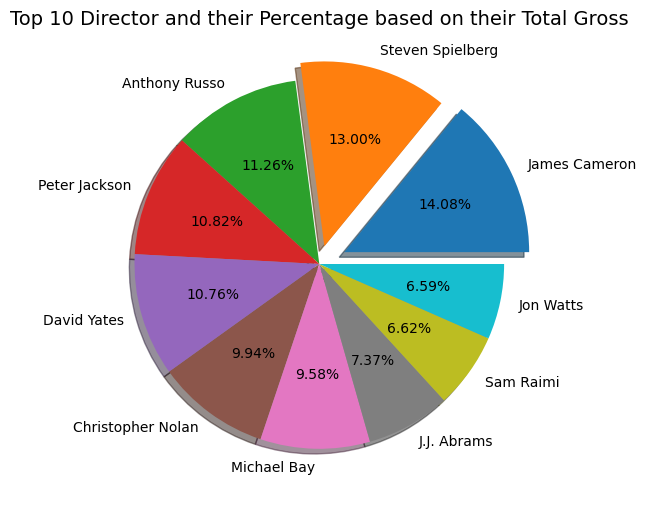

In [51]:
plt.figure(figsize=(6, 6))
plt.pie(director_gross,labels=director_gross.index, autopct='%1.2f%%',explode=[0.15,0.1,0,0,0,0,0,0,0,0],shadow=True)
plt.title(f'Top 10 Director and their Percentage based on their Total Gross', fontsize=14)
plt.show()

### Insights:
- James Cameron leads with the highest total gross percentage, followed closely by Steven Spielberg.
- Anthony Russo, Peter Jackson, and David Yates also contribute significantly to the total gross, showcasing their box office dominance.
- Directors like Jon Watts and Sam Raimi have lower percentages, but still rank within the top 10, reflecting notable commercial success.

In [52]:
director_title_rating = df.groupby(by=['Director', 'Title'])[['Rating']].sum()
director_title_rating = director_title_rating.sort_values(by='Rating',ascending=False).head(10)
director_title_rating

,,Rating
Director,Title,
Peter Jackson,The Lord of the Rings: The Return of the King,9.0
Christopher Nolan,The Dark Knight,9.0
Peter Jackson,The Lord of the Rings: The Fellowship of the Ring,8.9
Robert Zemeckis,Forrest Gump,8.8
Christopher Nolan,Inception,8.8
Peter Jackson,The Lord of the Rings: The Two Towers,8.8
Lana Wachowski,The Matrix,8.7
Christopher Nolan,Interstellar,8.7
Irvin Kershner,Star Wars: Episode V - The Empire Strikes Back,8.7


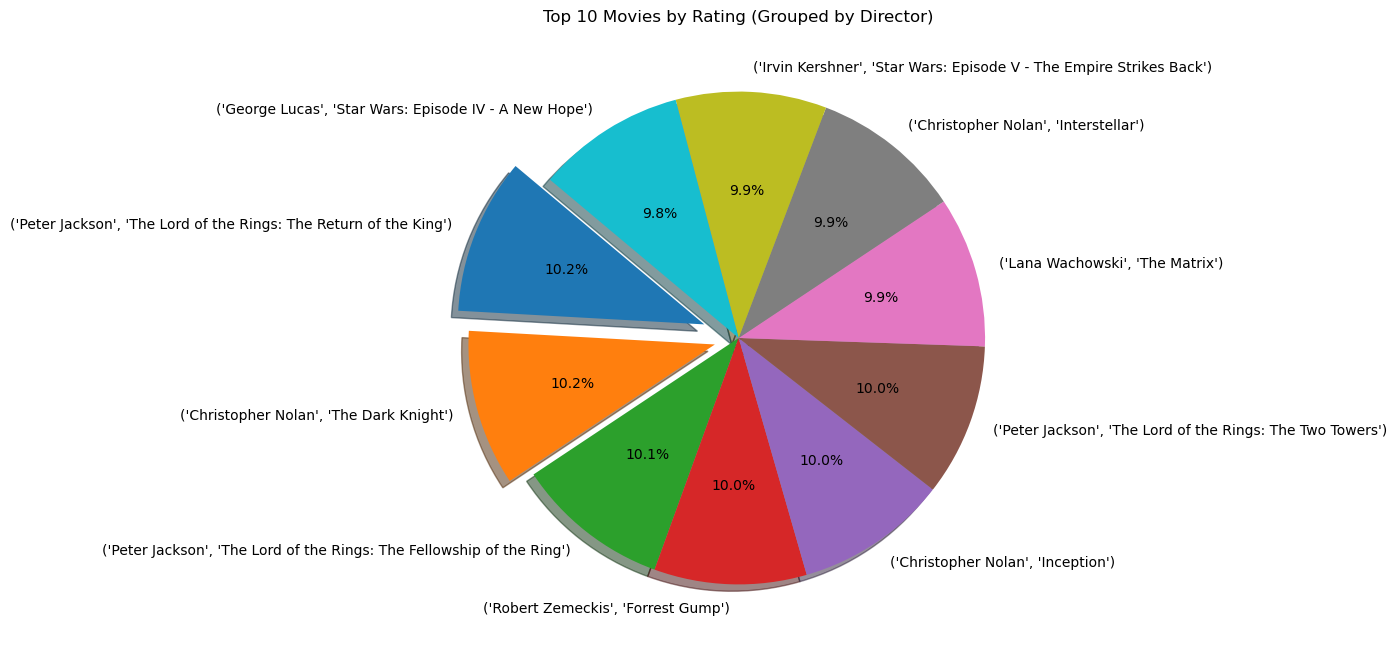

In [53]:
plt.figure(figsize=(10, 8))
plt.pie(director_title_rating['Rating'], labels=director_title_rating.index, autopct='%1.1f%%',explode=[0.15,0.1,0,0,0,0,0,0,0,0], startangle=140,shadow=True)
plt.title('Top 10 Movies by Rating (Grouped by Director)') 
plt.show()

### Insights:
- Peter Jackson and George Lucas lead with top-rated movies, mainly from the Lord of the Rings and Star Wars series.
- Christopher Nolan has multiple high-rated movies, reflecting his strong presence in the industry.
- Popular franchises and iconic directors dominate the highest-rated films, showing the audience's preference for established names.

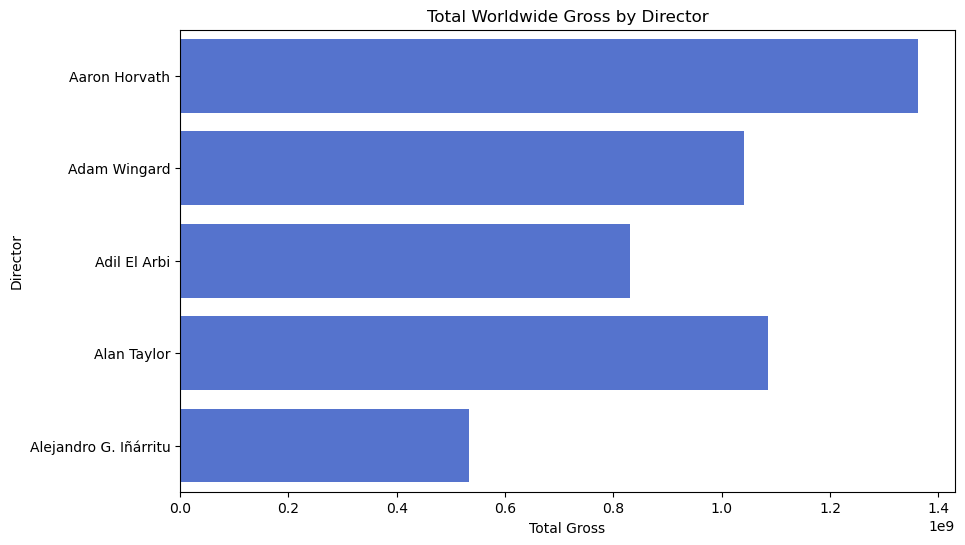

In [54]:
# Plotting the Total Worldwide Gross by Director using a bar Plot by pivot table
director_total_gross = df.pivot_table(values='Worldwide_Gross', index='Director', aggfunc='sum').head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=director_total_gross['Worldwide_Gross'].values, y=director_total_gross.index, color='royalblue')
plt.title('Total Worldwide Gross by Director')
plt.xlabel('Total Gross')
plt.ylabel('Director')
plt.show()

### Insights:
- Aaron Horvath has the highest total gross, standing out among the other directors.
- Adam Wingard follows, with a notable gross but significantly lower than Horvath.
- Alan Taylor and Adil El Arbi have moderate total grosses, closely following each other.
- Alejandro G. Iñárritu has the lowest total gross among the five directors shown, though still a considerable amount.

In [64]:
metascore = df["Metascore"].sort_values(ascending=False).head(10)
meta_rating= df.loc[metascore.index]

In [72]:
meta_rating

,Title,Year,Duration,Rating,Voting,Metascore,Director,Worldwide_Gross
356,Gone with the Wind,1939,238,8.2,345000.0,97.0,Victor Fleming,402382193
364,Toy Story,1995,81,8.3,1100000.0,96.0,John Lasseter,394436586
117,Gravity,2013,91,7.7,879000.0,96.0,Alfonso Cuarón,773031617
433,Spirited Away,2001,124,8.6,900000.0,96.0,Hayao Miyazaki,358129968
176,Ratatouille,2007,111,8.1,876000.0,96.0,Brad Bird,623728318
323,Beauty and the Beast,1991,84,8.0,491000.0,95.0,Gary Trousdale,424967620
233,WALL·E,2008,98,8.4,1300000.0,95.0,Andrew Stanton,527403656
240,La La Land,2016,128,8.0,713000.0,94.0,Damien Chazelle,509183536
30,The Lord of the Rings: The Return of the King,2003,201,9.0,2100000.0,94.0,Peter Jackson,1138027091
229,Dunkirk,2017,106,7.8,769000.0,94.0,Christopher Nolan,530432122


<Axes: title={'center': 'Top 10 Highest Matascore and their Titles'}, xlabel='Metascore', ylabel='Title'>

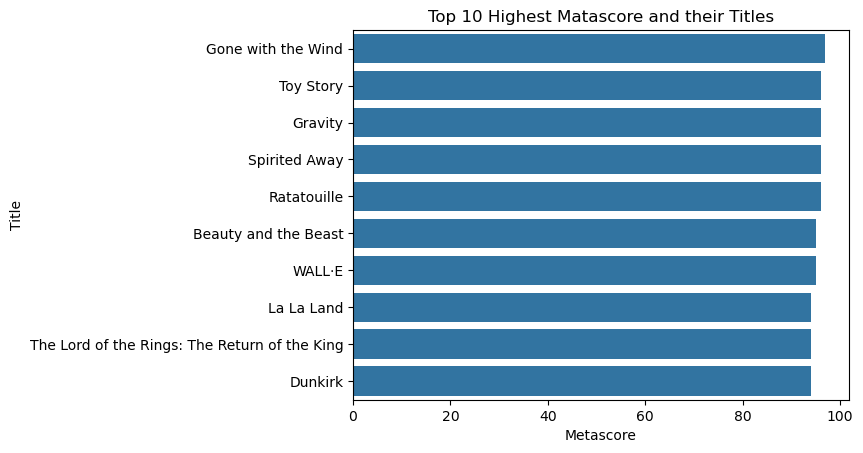

In [109]:
plt.title('Top 10 Highest Matascore and their Titles')
sns.barplot(meta_rating,x = "Metascore",y='Title')

### Insights:
+ Highest Rated Movies
+ The top-rated movie (highest Metascore) is Gone with the Wind.
+ Other movies like Toy Story, Gravity, and Spirited Away also have very high scores.

C:\Users\koush\AppData\Local\Temp\ipykernel_22628\3606925768.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(meta_rating, x = "Rating", hue = 'Metascore')


<Axes: xlabel='Rating', ylabel='Density'>

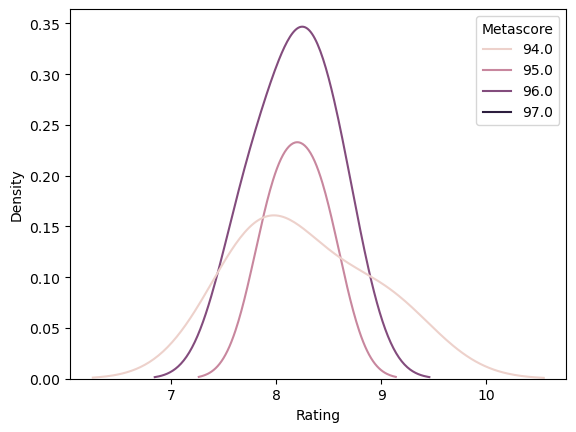

In [107]:
plt.title('Top 10 Highest Matascore and their Titles')
sns.kdeplot(meta_rating, x = "Rating", hue = 'Metascore')

### `Conclusion :`

Detailed Conclusion on IMDb Ratings Analysis
1. IMDb Rating Distribution
  + The `average` IMDb rating across all movies in the dataset is `6.99`, indicating that most movies receive positive but not exceptional ratings.
  + The `median rating is 7.0`, which suggests a balanced distribution with no extreme outliers significantly skewing the dataset.
  + The `highest`-rated movie has a rating of `9.0`, showing that very few films achieve near-perfect scores.
  + The `lowest`-rated movie has a `4.2`, meaning even the weakest films in this dataset are above the lowest possible rating (1.0).
2. Rating Trends and Audience Perception
  + `Most movies have ratings between 6.5 and 8.5`, showing that the majority are well-received by audiences.
  + A `smaller number of movies fall below 5.0`, which is generally considered "bad" by IMDb users.
  + `Movies rated above 8.5 are rare`, suggesting that only a select few are considered truly outstanding by the `majority of viewers`.
3. Correlation Between IMDb Rating & Metascore
  + The correlation coefficient of 0.78 indicates a strong positive correlation between IMDb ratings and Metascore.
  + This means that movies with high critical acclaim (Metascore) are also highly rated by audiences (IMDb Rating).
  + However, the correlation is not perfect (1.0), showing that some movies may have `high critic scores but lower audience ratings`, and vice versa.
+ This could be due to factors like:
+ Blockbuster appeal (some movies get high IMDb ratings due to fan followings).
+ Niche genres (critically acclaimed films might not always appeal to mass audiences).
+ Hype and nostalgia (older or franchise movies may get inflated ratings).